## How to generate and plot signals in sympy, with a focus on LTI modes

The first cell will define the various symbolic functions we need to use to generate the various signals

In [1]:
# import the necessary modules
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# define the variables that characterize a mode of a LTI
t     = sp.symbols('t',     real=True) # 'time'
m     = sp.symbols('m',     real=True) # multiplicity of the pole
sigma = sp.symbols('sigma', real=True) # real part of the pole
omega = sp.symbols('omega', real=True) # imaginary part of the pole
A     = sp.symbols('A',     real=True) # amplitude of the mode
theta = sp.symbols('theta', real=True) # phase shift of the mode

Now we define a simple step function, i.e.,

\begin{cases} 0 & \text{for}\: t < 0 \\1 & \text{otherwise} \end{cases}

⎧0  for t < 0
⎨            
⎩1  otherwise


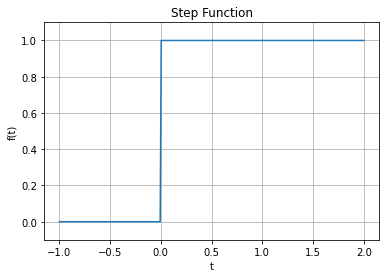

In [2]:
# define a step function in a symbolic format
step = sp.Piecewise((0, t < 0), (1, t >= 0))

# display it
sp.pprint(step)

# 'lambdify' the symbolic function
lambdified_step = sp.lambdify( t, step )
lambdified_t    = np.linspace( -1, 2, 300)

# plot it
plt.plot(lambdified_t, lambdified_step(lambdified_t))
plt.title('Step Function')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.ylim([-0.1, 1.1])
plt.grid(True)

Then we define and plot a mode of an LTI, i.e.,

\begin{cases} 0 & \text{for}\: t < 0 \\A t^{m} e^{\sigma t} \cos{\left(\omega 
t + \theta \right)} & \text{otherwise} \end{cases}

⎧          0             for t < 0
⎪                                 
⎨   m  σ⋅t                        
⎪A⋅t ⋅ℯ   ⋅cos(ω⋅t + θ)  otherwise
⎩                                 


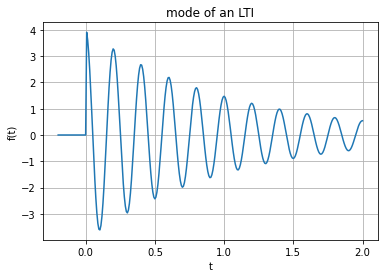

In [3]:
# define a mode in a symbolic format
my_exp = sp.Piecewise((0, t < 0), (A * t**m * sp.exp( sigma*t ) * sp.cos( omega*t + theta ), t >= 0))

# display it
sp.pprint(my_exp)

# substitute some specific values in the variables above
subs_exp = my_exp.subs(
            [(A,      4),
             (m,      0),
             (sigma, -1),
             (omega,  10*np.pi),
             (theta,  0)] )

# 'lambdify' the symbolic function
lambdified_exp = sp.lambdify( t, subs_exp )
lambdified_t   = np.linspace( -0.2, 2, 300)

# plot it
plt.plot(lambdified_t, lambdified_exp(lambdified_t))
plt.title('mode of an LTI')
plt.xlabel('t')
plt.ylabel('f(t)')
#plt.ylim([-0.1, 1.1])
plt.grid(True)

Now we compare the effect of $m$ on the shape of the mode. We will do it by defining a vector of signals, each parametrized with a different $m$.

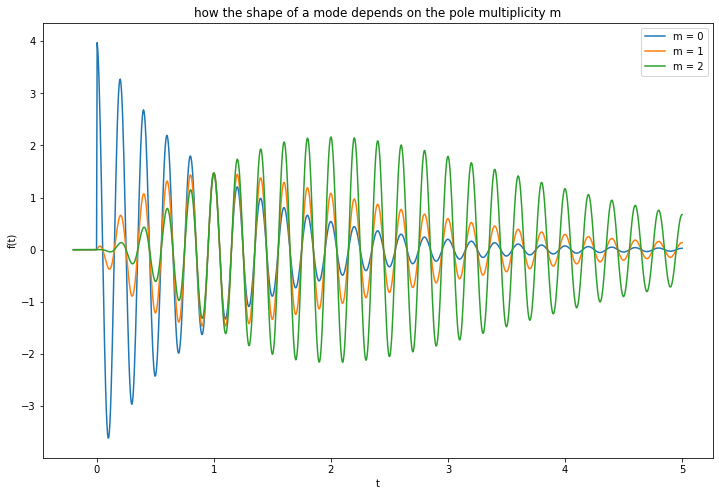

In [4]:
# substitute only some specific values in the variables above
subs_exp = my_exp.subs(
            [(A,      4),
             (sigma,  -1),
             (omega,  10*np.pi),
             (theta,  0)] )

# use another set of t's for this plot 
lambdified_t = np.linspace( -0.2, 5, 1000)

# and make the figure a bit bigger than before
plt.figure(figsize = (12,8))

# plot the various signals cycling on the potential values of m
for mm in range(0, 3):
    
    # get the actual signal 
    curr_exp = subs_exp.subs([(m, mm)])
    
    # plot it
    lambdified_exp = sp.lambdify( t, curr_exp )
    plt.plot(lambdified_t, lambdified_exp(lambdified_t), label=f'm = {mm}')

# set the various plot title and axis labels
plt.title('how the shape of a mode depends on the pole multiplicity m')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend(loc='upper right')

# display the plot
plt.show()


Now we check what happens if $m$ is very big and $\sigma < 0$. The theory says that eventually for $t$ sufficiently big the term $e^{\sigma t}$ will "dominate" the term $t^m$, i.e., that the former will go to zero "faster" than the latter will go to infinity (in the sense that their product will go to zero). But when does the former become dominant? Let's see in this example:

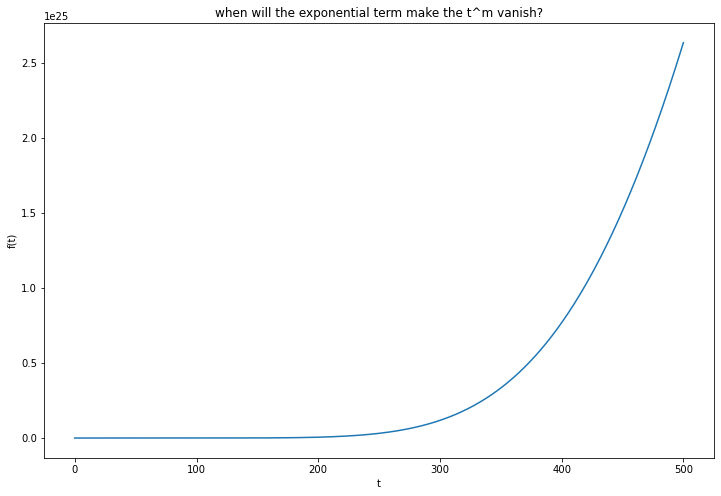

In [11]:
# let's keep m parametric, so to be able to change it faster
mm = 10

# use another set of t's for this plot -- we need longer time horizons!
lambdified_t = np.linspace( -0.2, 500, 1000)

# get the actual signal 
curr_exp = my_exp.subs(
            [(A,      4),
             (sigma,  -0.01),
             (omega,  0*np.pi),
             (theta,  0),
             (m,      mm)] )

lambdified_exp = sp.lambdify( t, curr_exp )

# plot it
plt.figure(figsize = (12,8))
plt.plot(lambdified_t, lambdified_exp(lambdified_t), label=f'm = {mm}')
plt.title('when will the exponential term make the t^m vanish?')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.show()